In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
import scipy

print(tf.__version__)

2.16.1


In [7]:
# Load dataset

#path for popOS
file_name = '/home/csalitre/School/ecgr-4127/tinyml/datasets/hw4_data.csv'
# path for wsl
#file_name = '/home/csalitre/school/ecgr-4127/tinyml/datasets/hw4_data.csv'
df = pd.read_csv(file_name)

df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '/home/csalitre/school/ecgr-4127/tinyml/datasets/hw4_data.csv'

In [ ]:
# convert columns to numpy arrays
model_output = df['model_output'].to_numpy() 
prediction = df['prediction'].to_numpy()
true_class = df['true_class'].to_numpy()

model_output[:5]

array([ 6.03973338,  2.45078686,  2.4178825 , -0.4515346 ,  1.17339604])

In [5]:
# Find metrics TP, FP, TN, FN, precision and recall
true_positives = ((df['prediction'] == 1) & (df['true_class'] == 1)).sum()
false_positives = ((df['prediction'] == 1) & (df['true_class'] == 0)).sum()
true_negatives = ((df['prediction'] == 0) & (df['true_class'] == 0)).sum()
false_negatives = ((df['prediction'] == 0) & (df['true_class'] == 1)).sum()

precision = round(true_positives / (true_positives + false_positives), 4)
recall = round(true_positives / (true_positives + false_negatives), 4)

print(f"True Positives: {true_positives}")
print(f"False Positives: {false_negatives}")
print(f"True Negatives: {true_negatives}")
print(f"False Negatives: {false_negatives}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

NameError: name 'df' is not defined

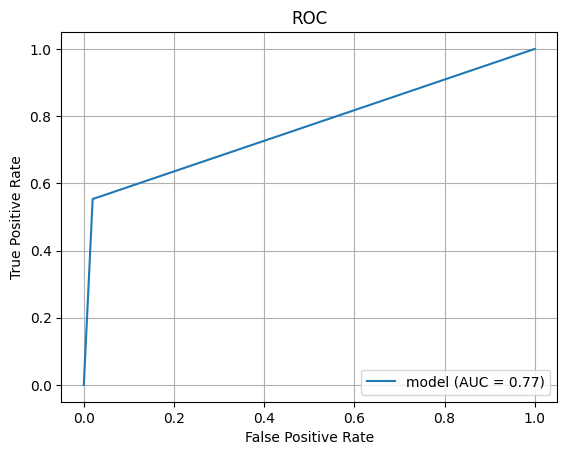

In [ ]:
# Plot ROC curve
fpr, tpr, threshold = metrics.roc_curve(true_class, prediction)
roc_auc = metrics.auc(fpr, tpr)

metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='model').plot()

plt.title('ROC curve')
plt.grid(True)
plt.show()


In [4]:
# find the minimum FP rate you can achieve to correctly detect at least 90% of all actual positives
# FP = (true positives/precision) - true positives -- precision = 0.9
min_false_positives = (true_positives / precision) - true_positives
print(f"The minimum False Positive Rate: {min_false_positives}")


NameError: name 'true_positives' is not defined